# 1. import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,4

# 2. import data

In [3]:
df = pd.read_csv('0 Data/raw_data.csv')
df = df[df['Incidence']==1]
df.shape

(14638, 24)

# 3. model data

In [4]:
df['Mean_Price'] = (df['Price_1'] + df['Price_2'] + df['Price_3'] + df['Price_4'] + df['Price_5'] ) / 5
df['Mean_Promotion'] = (df['Promotion_1'] + df['Promotion_2'] + df['Promotion_3'] + df['Promotion_4'] + df['Promotion_5'] ) / 5
X = df[['Mean_Price', 'Mean_Promotion']]
Y = df['Quantity']
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mean_Price,14638.0,1.993985,0.052734,1.872,1.966,2.002,2.03,2.102
Mean_Promotion,14638.0,0.187895,0.167939,0.000,0.000,0.200,0.20,0.600


In [5]:
price_range = np.arange(0.5, 3.5, 0.05)
price_range

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ,
       1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55,
       1.6 , 1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 ,
       2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65,
       2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 ,
       3.25, 3.3 , 3.35, 3.4 , 3.45])

In [6]:
df_test = pd.DataFrame(price_range)
df_test = df_test.rename(columns = {0: 'Mean_Price'})
df_test['Mean_Promotion'] = 1
df_test.shape

(60, 2)

# 4. model

In [7]:
model_purchase = LinearRegression()
model_purchase.fit(X, Y)
model_purchase.coef_

array([-1.62946017,  0.21084495])

In [8]:
Beta = model_purchase.coef_[0]
Beta

-1.6294601658707784

# 5. price elasticity

In [9]:
predict_quantity = model_purchase.predict(df_test)
predict_quantity

array([5.38017626, 5.29870325, 5.21723024, 5.13575723, 5.05428422,
       4.97281122, 4.89133821, 4.8098652 , 4.72839219, 4.64691918,
       4.56544617, 4.48397317, 4.40250016, 4.32102715, 4.23955414,
       4.15808113, 4.07660812, 3.99513512, 3.91366211, 3.8321891 ,
       3.75071609, 3.66924308, 3.58777007, 3.50629707, 3.42482406,
       3.34335105, 3.26187804, 3.18040503, 3.09893202, 3.01745902,
       2.93598601, 2.854513  , 2.77303999, 2.69156698, 2.61009397,
       2.52862097, 2.44714796, 2.36567495, 2.28420194, 2.20272893,
       2.12125592, 2.03978292, 1.95830991, 1.8768369 , 1.79536389,
       1.71389088, 1.63241787, 1.55094487, 1.46947186, 1.38799885,
       1.30652584, 1.22505283, 1.14357983, 1.06210682, 0.98063381,
       0.8991608 , 0.81768779, 0.73621478, 0.65474178, 0.57326877])

In [10]:
price_elasticity = Beta * price_range / predict_quantity
price_elasticity

array([-0.15143186, -0.16913631, -0.1873937 , -0.20623037, -0.22567431,
       -0.24575538, -0.26650542, -0.28795841, -0.3101507 , -0.33312117,
       -0.35691148, -0.38156633, -0.4071337 , -0.43366522, -0.46121647,
       -0.48984739, -0.51962272, -0.55061247, -0.58289249, -0.61654506,
       -0.65165963, -0.68833359, -0.72667317, -0.76679449, -0.8088247 ,
       -0.85290334, -0.89918392, -0.94783566, -0.99904557, -1.05302087,
       -1.10999178, -1.17021479, -1.23397656, -1.30159843, -1.37344188,
       -1.44991496, -1.53148009, -1.61866337, -1.71206596, -1.81237798,
       -1.92039554, -2.03704198, -2.16339427, -2.3007164 , -2.4505018 ,
       -2.61452786, -2.7949268 , -2.99427889, -3.21573663, -3.4631927 ,
       -3.74151076, -4.0568483 , -4.41711755, -4.83265849, -5.31724736,
       -5.88965348, -6.57612673, -7.41453673, -8.46160238, -9.80628615])

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

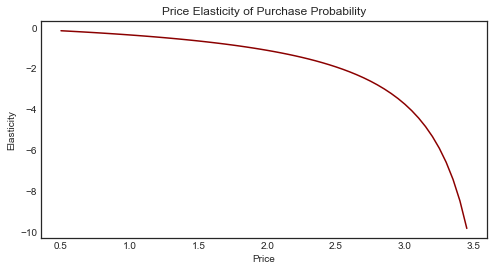

In [11]:
plt.plot(price_range,price_elasticity,color='darkred')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')